# Resposta ao impulso unitário e somatória de convolução

Renato Naville Watanabe

A **resposta ao impulso unitário** (às vezes também chamada de **resposta impulsiva**) de um sistema discreto é o sinal de saída de um sistema quando um impulso unitário $\delta[n]$ é usado como sinal de entrada. A resposta ao impulso é normalmente representada pela letra $h[n]$.

<img src=diagimpulso.png width="300">

Para calcular a resposta ao impulso de um sistema de tempo discreto, basta colocar o sinal $\delta[n]$ como entrada do sistema, e calcular os valores de forma recursiva.

Por exemplo, para o sistema com a seguinte equação de diferença:

$$y[n] = 1x[n] - 0.6x[n-1] + 0.3x[n-2] + 0.1x[n-3]$$

Usando $x[n] = \delta[n]$, temos:

$h[0] = \delta[0] - 0.6 \delta[-1] + 0.3 \delta[-2] + 0.1 \delta[-3] = 1$

$h[1] = \delta[1] - 0.6 \delta[0] + 0.3 \delta[-1] + 0.1 \delta[-2] = -0.6$

$h[2] = \delta[2] - 0.6 \delta[1] + 0.3 \delta[0] + 0.1 \delta[-1] = 0.3$

$h[3] = \delta[3] - 0.6 \delta[2] + 0.3 \delta[1] + 0.1 \delta[0] = 0.1$

$h[4] = \delta[4] - 0.6 \delta[3] + 0.3 \delta[2] + 0.1 \delta[1] = 0$

$\vdots $

$h[k] = 0, k>3$

O gráfico da resposta ao impulso está abaixo:

Text(0.5, 0, 'n')

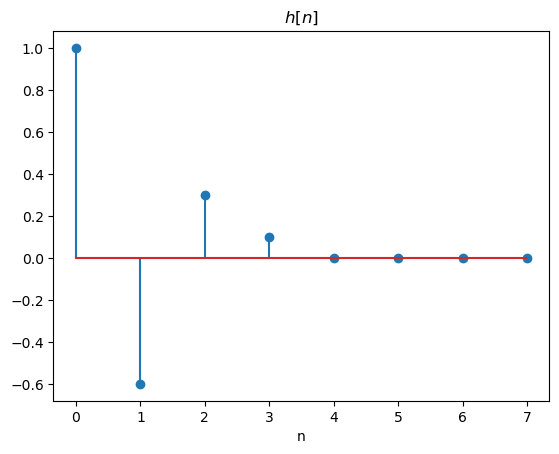

In [3]:
import matplotlib.pyplot as plt
import numpy as np

def delta(k, N):
    impulso = np.zeros(N)
    impulso[k] = 1
    return impulso


x = delta(0, 8)
y = np.zeros_like(x)
for n in range(len(x)):
    y[n] = x[n] - 0.6*x[n-1]+0.3*x[n-2]+0.1*x[n-3]
plt.stem(y)
plt.title('$h[n]$')
plt.xlabel('n')

Sempre que o si

Como o sistema é linear e invariante no tempo se usarmos como entrada o impulso unitário multiplicado por um valor real e atrasado de algumas unidades de tempo ($\alpha\delta[n-N]$), a saída será $\alpha h[n-N]$.

<img src=diagimpulsodelay.png width="400">

Vamos começar com um  sinal $x[n]$ qualquer:

In [ ]:

n = np.arange(16)
plt.figure(figsize=(4,4))
x = np.cos(np.pi/12*n)
plt.stem(np.cos(np.pi/12*n))

Se multiplicarmos o sinal por $\delta[0]$  (que tem o valor 1 quando $n = 0$, e 0 em todo o resto), teremos um sinal que no instante 0 é igual $x[0]$ e 0 em todos os outros instantes. Da mesma forma, se multiplicarmos o sinal $x[n]$ por $\delta[n-k]$, vamos obter um sinal que é igual a $x[k]$ no instante $k$ e 0 em todos os outros instantes.

In [ ]:
fig, axs = plt.subplots(4,4, figsize=(10, 8), sharey=True, sharex=True)

for k in range(16):
    axs[k//4, k%4].stem(n, x*delta(k, len(x)))
    axs[k//4, k%4].title.set_text(f'$x[{k}]\delta[n-{k}]$')

Pela figura acima, vemos que cada gráfico tem o valor do sinal $x[n]$ em um instante $k$. Então podemos reescrever o sinal $x[n]$ como:

$$x[n] = \displaystyle\sum_{k=-\infty}^\infty x[k]\delta[n-k]$$

Ou seja, o sinal $x[n]$ é uma soma de impulsos deslocados no tempo 

In [ ]:
axs[0,0]